In [219]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2 
import networkx as nx 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from math import sqrt
import pandas as pd 

In [220]:
def read_edges(filename,is_directed=False):
    file = open(filename, 'r',encoding='utf-8')
    lines = list(file.read().split("\n"))
    graph = nx.Graph()
    if is_directed:
        graph = nx.DiGraph()
    for line in lines :
        if line is None or line == '' or line == "\n":
            continue
        s,t,w = line.split()
        graph.add_edge(int(s),int(t))
        s,t = int(s),int(t)
    return graph


In [221]:
def ClosenessCentralityScratch(graph):
    connected_components_sorted = sorted(nx.connected_components(graph), key=len, reverse=True)
    giant_graph = graph.subgraph(connected_components_sorted[0])
    giant_nodes = giant_graph.nodes()

    closeness_centrality = {}
    for node in tqdm(giant_nodes):
        shortest_paths = nx.shortest_path_length(giant_graph,source=node)
        sum_shortest_paths = 0
        for key in shortest_paths:
            sum_shortest_paths += shortest_paths[key]
        closeness_centrality[node] = (len(giant_nodes))/sum_shortest_paths
    closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: -item[1]))
    print(min(closeness_centrality.values()),max(closeness_centrality.values()))

    """
    # this code is for checking the correctness of above code
    closeness_centrality_2 = nx.closeness_centrality(giant_graph)
    closeness_centrality_2 = dict(sorted(closeness_centrality_2.items(), key=lambda item: -item[1]))
    print(min(closeness_centrality_2.values()),max(closeness_centrality_2.values()))
    """
    return closeness_centrality


def EfficiencyCenteralityScratch(graph):
    efficiency_centrality = {}
    n = len(graph.nodes())
    for node in tqdm(graph.nodes()):
        shortest_paths = nx.shortest_path_length(graph,source=node)
        sum_shortest_paths = 0
        for key in shortest_paths:
            if key == node:
                continue
            sum_shortest_paths += 1/shortest_paths[key]

        efficiency_centrality[node] = (1/(n-1))*sum_shortest_paths
    efficiency_centrality = dict(sorted(efficiency_centrality.items(), key=lambda item: -item[1]))
    print(min(efficiency_centrality.values()),max(efficiency_centrality.values()))

    """
    # this code is for checking the correctness of above code
    efficiency_centrality_2 = {}
    for n1 in tqdm(graph.nodes()):
        E = 0 
        for n2 in graph.nodes():
            if n1 == n2:
                continue

            E += nx.efficiency(graph,n1,n2)
        efficiency_centrality_2[n1] = E/(n-1)
    efficiency_centrality_2 = dict(sorted(efficiency_centrality_2.items(), key=lambda item: -item[1]))
    print(min(efficiency_centrality_2.values()),max(efficiency_centrality_2.values()))
    """
    return efficiency_centrality


def DegreeCentralityScratch(graph):
    degree_centrality = {}
    for node in tqdm(graph.nodes()):
        degree = len(graph.edges(node))
        degree_centrality[node] = degree/len(graph.nodes())

    degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: -item[1]))
    print(min(degree_centrality.values()),max(degree_centrality.values()))

    """
    # this code is for checking the correctness of above code
    degree_centrality_2 = nx.degree_centrality(graph)
    degree_centrality_2 = dict(sorted(degree_centrality_2.items(), key=lambda item: -item[1]))
    print(min(degree_centrality_2.values()),max(degree_centrality_2.values()))
    """

    return degree_centrality

def KatzCentralityScratch(graph,alpha=0.001,beta=10,iterations=10000,tolorance=1e-6):
    n_nodes = graph.number_of_nodes()
    katz_centrality = dict([(n,0) for n in graph])
    
    for i in tqdm(range(iterations)):
        katz_centrality_previos = katz_centrality
        katz_centrality = dict.fromkeys(katz_centrality_previos, 0)

        for n in katz_centrality:
            for neighbor in graph[n]:
                katz_centrality[neighbor] += katz_centrality_previos[n] * graph[n][neighbor].get("weight", 1)

        for n in katz_centrality:
            katz_centrality[n] = alpha*katz_centrality[n] + beta
 
        err = sum([abs(katz_centrality[n]-katz_centrality_previos[n]) for n in katz_centrality])
        if err < n_nodes * tolorance:
            break
 
    katz_centrality = dict(sorted(katz_centrality.items(), key=lambda item: -item[1]))
    return katz_centrality



100%|██████████| 1572/1572 [00:16<00:00, 98.20it/s] 


0.17261447238388053 0.4987309644670051


100%|██████████| 1574/1574 [00:02<00:00, 622.09it/s]


0.0006357279084551812 0.5660309387582183


100%|██████████| 1574/1574 [00:00<00:00, 162955.95it/s]


0.0006353240152477764 0.19949174078780177


  0%|          | 7/10000 [00:00<03:05, 53.88it/s]


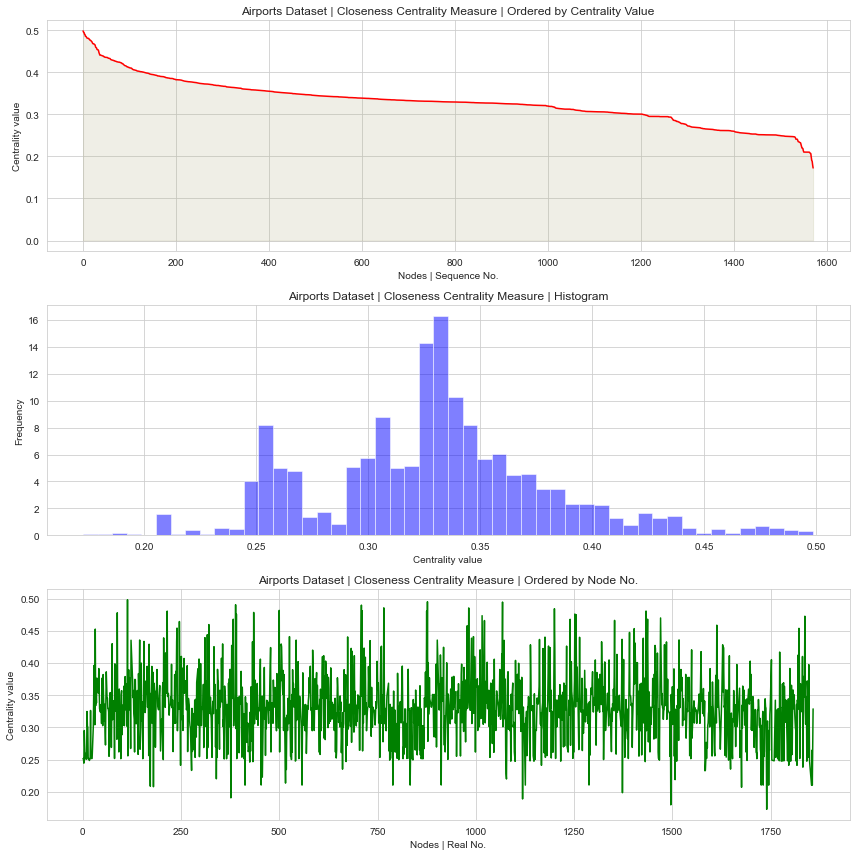

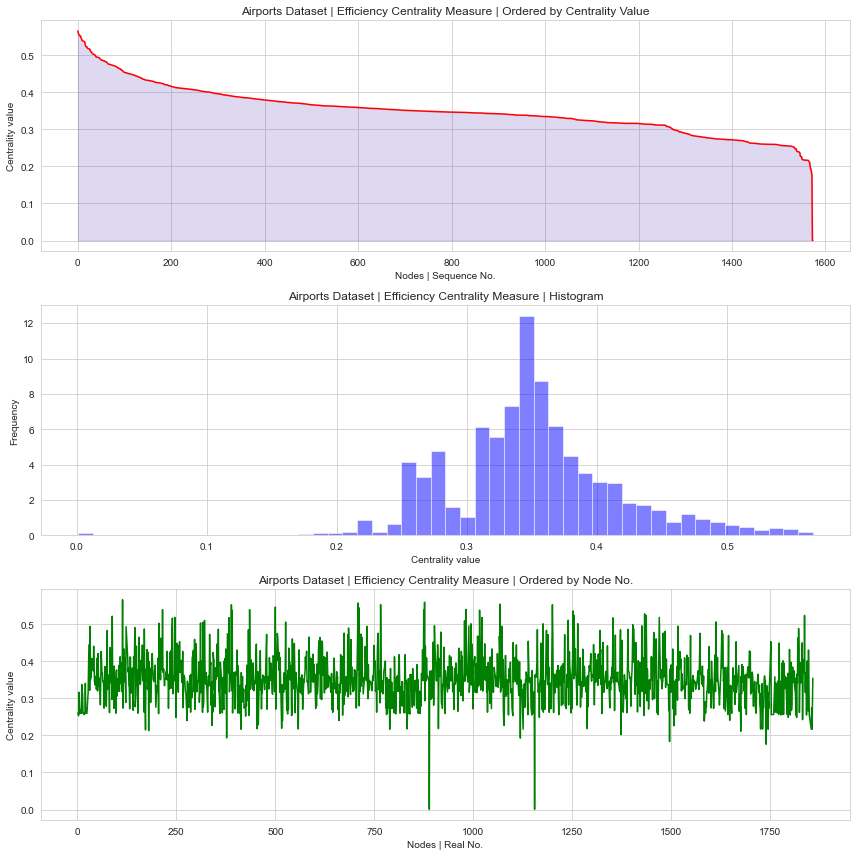

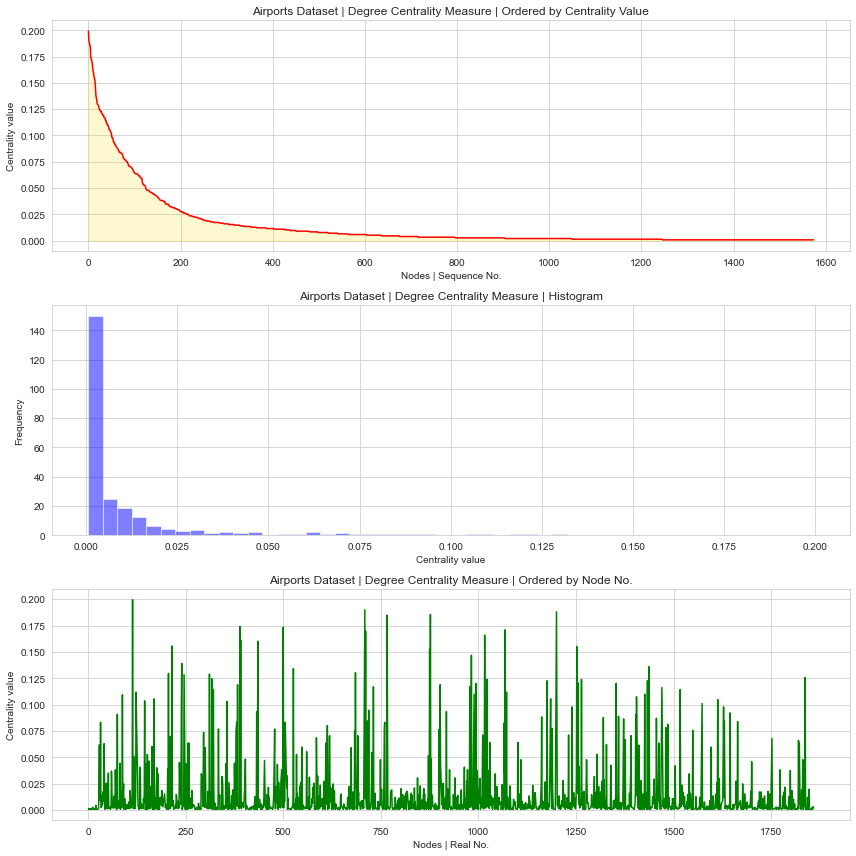

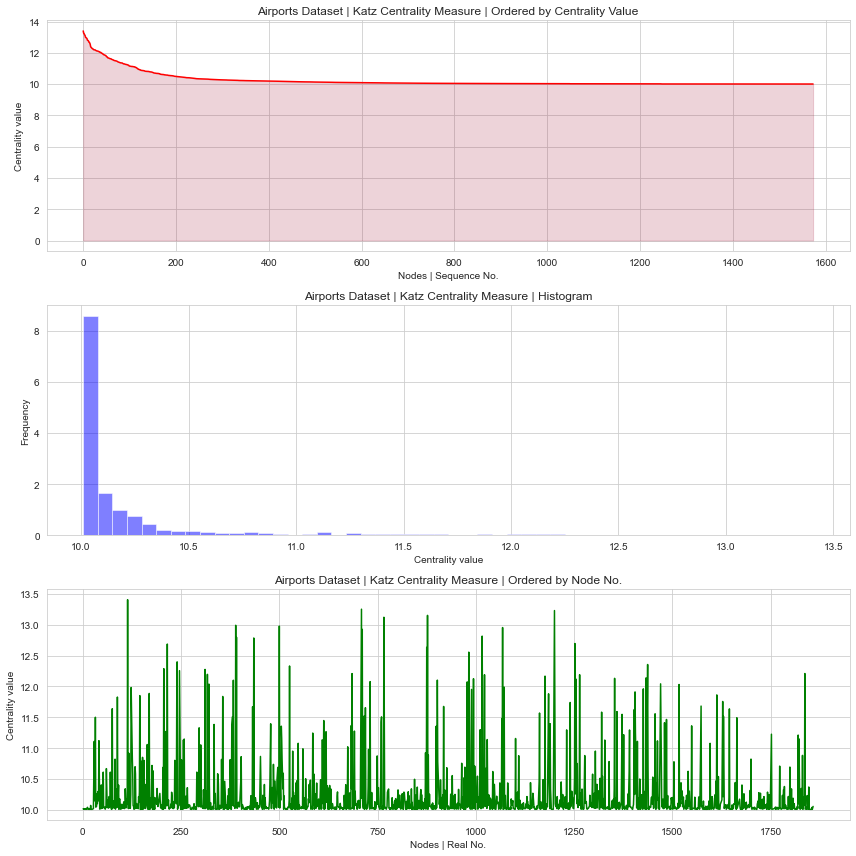

100%|██████████| 1707/1707 [00:12<00:00, 141.93it/s]


0.1662770309760374 0.5032429245283019


100%|██████████| 1773/1773 [00:02<00:00, 793.43it/s]


0.001128668171557562 0.553423626787064


100%|██████████| 1773/1773 [00:00<00:00, 175087.73it/s]


0.0011280315848843769 0.20530174844895657


  0%|          | 5/10000 [00:00<01:40, 99.05it/s]


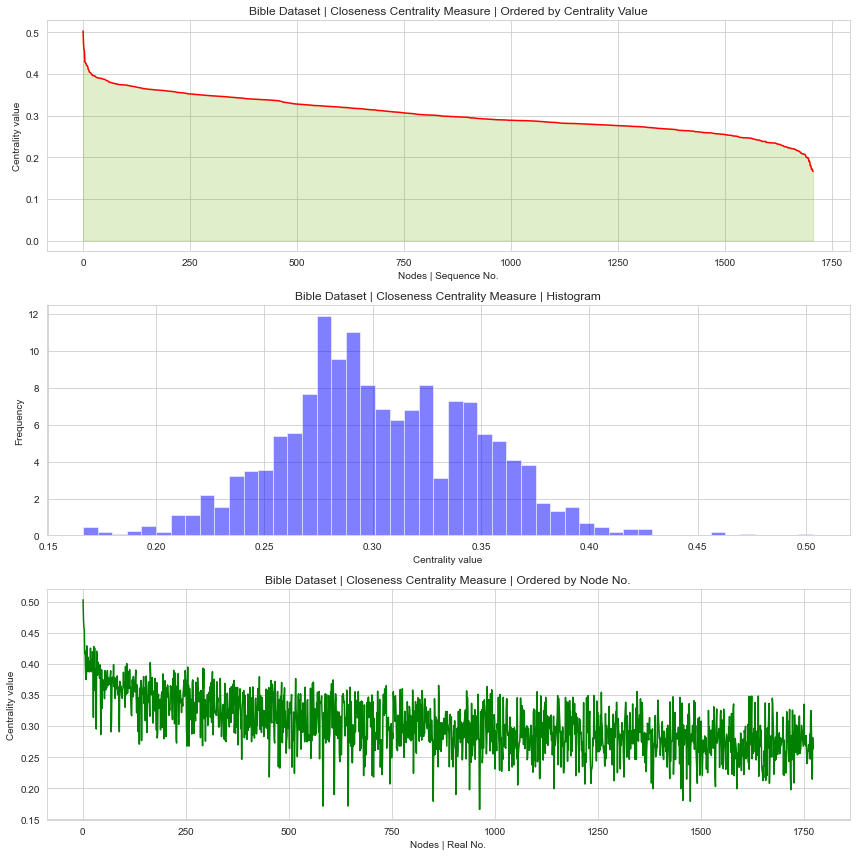

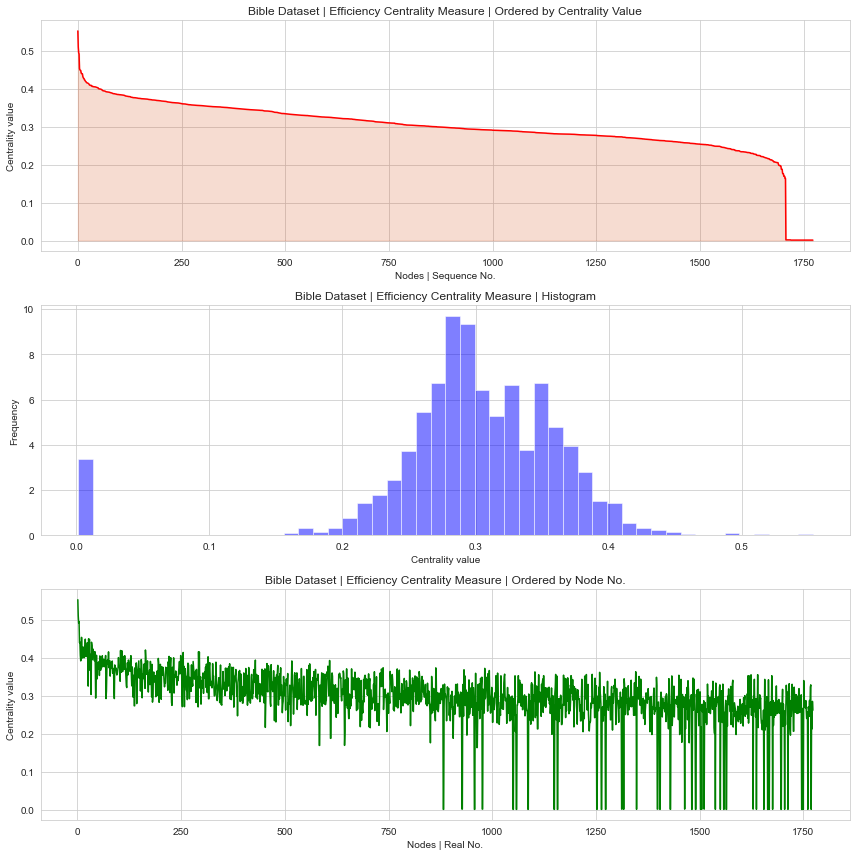

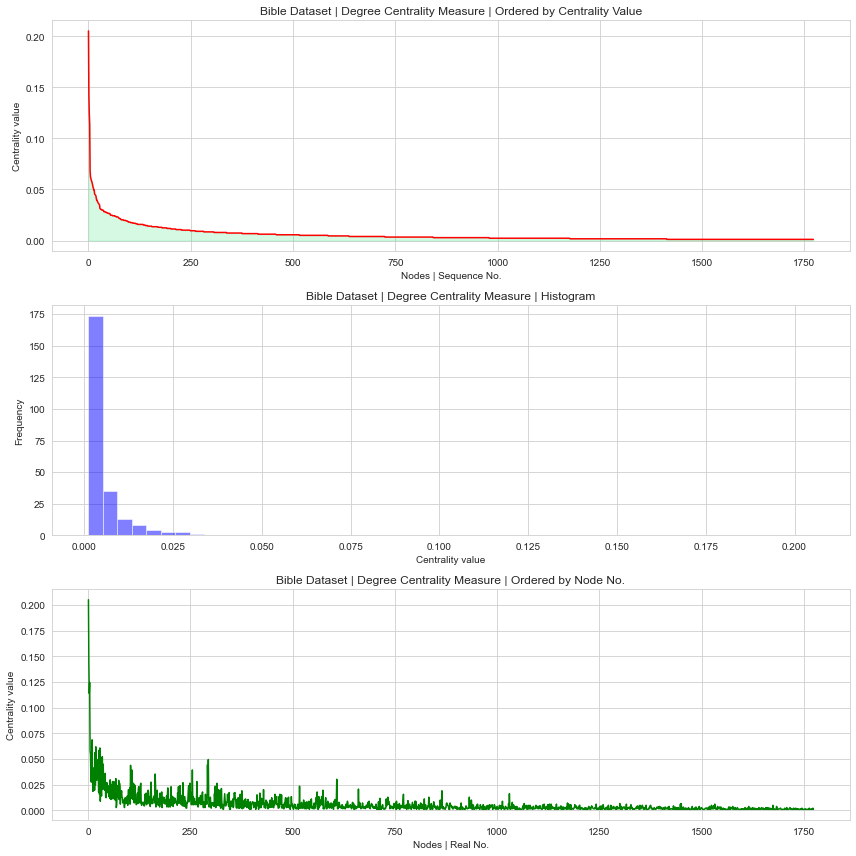

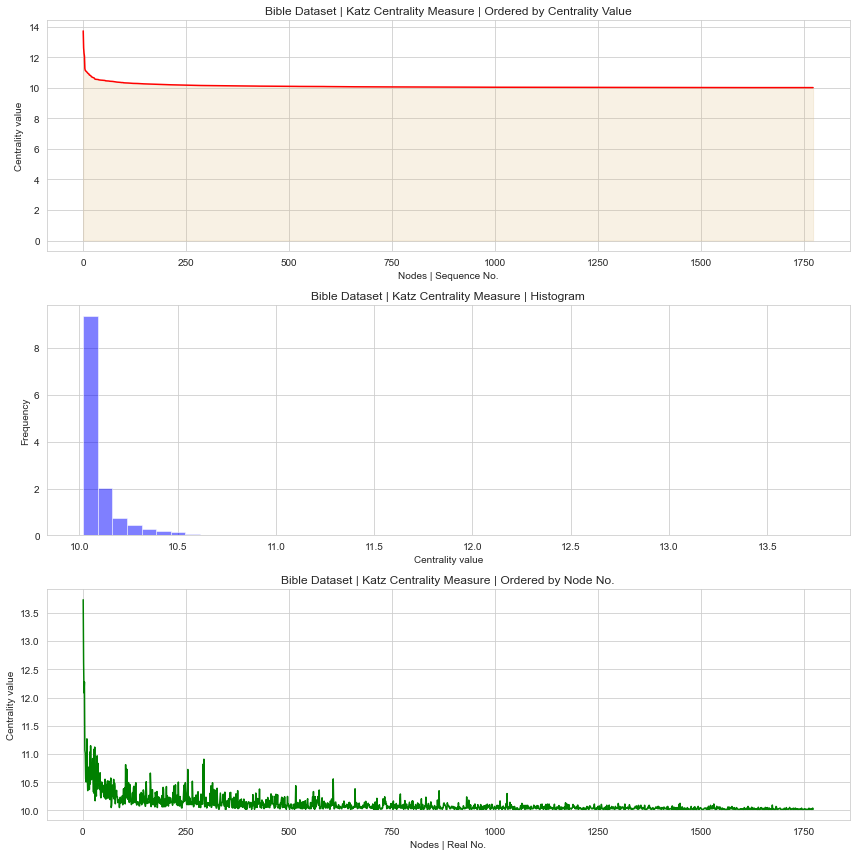

In [226]:
graph_paths = ["./airports.edges","./bible.edges"]
graph_names = ["Airports","Bible"]
data_frames = []

def get_name_ariport(_id):
    code_des = pd.read_csv("./name_of_airports.csv")
    id_code = pd.read_csv("./airports.codes",sep=" ")
    code = id_code[id_code["ID"]==_id]["AirportName"].values[0]
    des = code_des[code_des["Code"]==code]["Description"].values[0]
    return str(code)+" | "+str(des)

def get_name_bible(_id):
    id_name = pd.read_csv("./bible.names",sep=" ")
    name = id_name[id_name["ID"]==_id]["biblicalNouns"].values[0]
    return name
    
for i in range(len(graph_paths)):
    graph = read_edges(graph_paths[i])
    name = graph_names[i]

    measure_names = ["Closeness Centrality","Efficiency Centrality","Degree Centrality","Katz Centrality"]
    clossness_centrality = ClosenessCentralityScratch(graph)
    efficiency_centrality = EfficiencyCenteralityScratch(graph)
    degree_centrality = DegreeCentralityScratch(graph)
    katz_centrality = KatzCentralityScratch(graph)
    measures = [clossness_centrality,efficiency_centrality,degree_centrality,katz_centrality]


    data = {}
    for j in range(len(measures)):
        plt.figure(figsize=(12,12))
        sns.set_style("whitegrid")
        plt.subplot(3,1,1)
        measure = measures[j]
        measure_name = measure_names[j]

        if name == "Airports":
            data[measure_name] = list(map(get_name_ariport, list(measure.keys())[:10]))

        else:
            data[measure_name] = list(map(get_name_bible, list(measure.keys())[:10]))

        sns.lineplot(x=range(len(measure.keys())),y=measure.values(),color="red")
        plt.fill_between(range(len(measure.keys())),measure.values(),color=tuple(np.random.rand(3)),alpha=0.2)
        plt.xlabel("Nodes | Sequence No.")
        plt.ylabel("Centrality value")
        plt.title(name+" Dataset | "+measure_name + " Measure | Ordered by Centrality Value")

        plt.subplot(3,1,2)
        plt.hist(measure.values(),color="blue",alpha=0.5,bins=50,density=True)
        plt.xlabel("Centrality value")
        plt.ylabel("Frequency")
        plt.title(name+" Dataset | "+measure_name + " Measure | Histogram")

        plt.subplot(3,1,3)
        measure = dict(sorted(measure.items(), key=lambda item: item[0]))
        plt.plot(measure.keys(),measure.values(),color="green")
        plt.xlabel("Nodes | Real No.")
        plt.ylabel("Centrality value")
        plt.title(name+" Dataset | "+measure_name + " Measure | Ordered by Node No.")


        out = open("P2_"+name+"_"+measure_name.replace(" ","")+".txt","w")
        for key in measure:
            out.write(str(key)+": "+str(measure[key])+"\n")
        out.close()

        

        
            

        plt.tight_layout()
        plt.savefig("P2_"+name+"_"+measure_name+".png")
        plt.show()
    _data = pd.DataFrame(data)
    _data.style.set_properties(**{'text-align': 'center'})
    _data.index = np.arange(1, len(_data) + 1)
    data_frames.append(_data)


    


In [227]:
data_frames[1]

,Closeness Centrality,Efficiency Centrality,Degree Centrality,Katz Centrality
1,israel,israel,israel,israel
2,judah,judah,judah,judah
3,jerusalem,david,david,david
4,david,jerusalem,jerusalem,jerusalem
5,egypt,egypt,egypt,egypt
6,ephraim,ephraim,benjamin,benjamin
7,manasseh,benjamin,manasseh,manasseh
8,benjamin,manasseh,ephraim,ephraim
9,joseph,moses,saul,saul
10,moses,joseph,philistines,philistines


In [228]:
data_frames[0]

,Closeness Centrality,Efficiency Centrality,Degree Centrality,Katz Centrality
1,"ATL | Atlanta, GA: Hartsfield-Jackson Atlanta ...","ATL | Atlanta, GA: Hartsfield-Jackson Atlanta ...","ATL | Atlanta, GA: Hartsfield-Jackson Atlanta ...","ATL | Atlanta, GA: Hartsfield-Jackson Atlanta ..."
2,"LAX | Los Angeles, CA: Los Angeles International","LAX | Los Angeles, CA: Los Angeles International","IAD | Washington, DC: Washington Dulles Intern...","IAD | Washington, DC: Washington Dulles Intern..."
3,"MSP | Minneapolis, MN: Minneapolis-St Paul Int...","IAD | Washington, DC: Washington Dulles Intern...","ORD | Chicago, IL: Chicago O'Hare International","ORD | Chicago, IL: Chicago O'Hare International"
4,"DEN | Denver, CO: Denver International","MSP | Minneapolis, MN: Minneapolis-St Paul Int...","LAX | Los Angeles, CA: Los Angeles International","LAX | Los Angeles, CA: Los Angeles International"
5,"IAD | Washington, DC: Washington Dulles Intern...","JFK | New York, NY: John F. Kennedy International","JFK | New York, NY: John F. Kennedy International","JFK | New York, NY: John F. Kennedy International"
6,"JFK | New York, NY: John F. Kennedy International","ORD | Chicago, IL: Chicago O'Hare International","DEN | Denver, CO: Denver International","DEN | Denver, CO: Denver International"
7,"MCO | Orlando, FL: Orlando International","DEN | Denver, CO: Denver International","EWR | Newark, NJ: Newark Liberty International","EWR | Newark, NJ: Newark Liberty International"
8,"ORD | Chicago, IL: Chicago O'Hare International","EWR | Newark, NJ: Newark Liberty International","MSP | Minneapolis, MN: Minneapolis-St Paul Int...","MSP | Minneapolis, MN: Minneapolis-St Paul Int..."
9,"EWR | Newark, NJ: Newark Liberty International","IAH | Houston, TX: George Bush Intercontinenta...","IAH | Houston, TX: George Bush Intercontinenta...","IAH | Houston, TX: George Bush Intercontinenta..."
10,"IAH | Houston, TX: George Bush Intercontinenta...","MCO | Orlando, FL: Orlando International","MIA | Miami, FL: Miami International","MIA | Miami, FL: Miami International"
